**8. This question involves the use of simple linear regression on the Auto
data set**

**a) Use the lm() function to perform a simple linear regression with
mpg as the response and horsepower as the predictor. Use the
summary() function to print the results. Comment on the output.
For example**

**i. Is there a relationship between the predictor and the response?**

**ii. How strong is the relationship between the predictor and
the response?**

**iii. Is the relationship between the predictor and the response
positive or negative?**

**iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confidence and prediction
intervals?**

**(b) Plot the response and the predictor. Use the abline() function
to display the least squares regression line.**

**(c) Use the plot() function to produce diagnostic plots of the least
squares regression fit. Comment on any problems you see with
the fit.**

In [0]:
import pandas as pd
import statsmodels.formula.api as sms
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


bd1 = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

bd1.head()


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [0]:
# a) ANSWER

reg1 = sms.ols(data = bd1, formula = 'mpg ~ hp').fit()

print(reg1.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Mon, 18 Mar 2019   Prob (F-statistic):           1.79e-07
Time:                        22:40:06   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0989      1.634     18.421      0.0


**i. Is there a relationship between the predictor and the response?**

**ii. How strong is the relationship between the predictor and
the response?**

**iii. Is the relationship between the predictor and the response
positive or negative?**

*Yes, there is a statistically significant negative linear relationship between the predictor and the response, moreover it explains 60,2% of the response variance.*


**iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confidence and prediction
intervals?**

$\hat y = 30,0989 + 98 * (-0,0682)$


In [0]:
# answer to item (iv)

hp_fit = pd.DataFrame({'hp' : [98]})

reg1_fit = reg1.get_prediction(hp_fit)

reg1_fit.summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,23.412489,0.84206,21.692774,25.132205,15.338009,31.48697


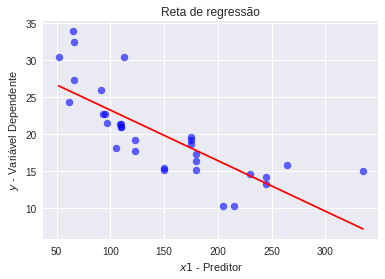

In [0]:
# b) Answer

plt.scatter(y=bd1['mpg'], x=bd1['hp'], color='blue', s=50, alpha=.6)

X_plot = np.linspace(min(bd1['hp']), max(bd1['hp']), len(bd1['hp']))

plt.plot(X_plot, X_plot*reg1.params[1] + reg1.params[0], color='r')

plt.title('Reta de regressão')

plt.ylabel('$y$ - Variável Dependente')

plt.xlabel('$x1$ - Preditor')

plt.show()



In [0]:
# c) answer


# fitted values (need a constant term for intercept)
reg1_fitted_y = reg1.fittedvalues

# model residuals
reg1_residuals = reg1.resid

# normalized residuals
reg1_norm_residuals = reg1.get_influence().resid_studentized_internal

# absolute squared normalized residuals
reg1_norm_residuals_abs_sqrt = np.sqrt(np.abs(reg1_norm_residuals))

# absolute residuals
reg1_abs_resid = np.abs(reg1_residuals)

# leverage, from statsmodels internals
reg1_leverage = reg1.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
reg1_cooks = reg1.get_influence().cooks_distance[0]



In [0]:
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

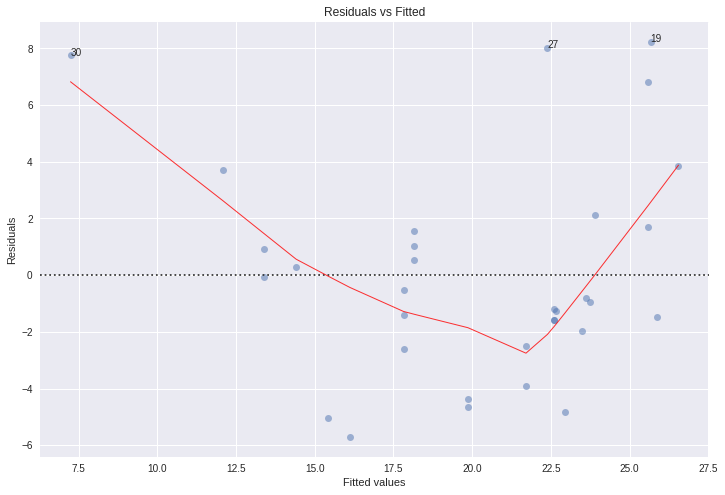

In [0]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(reg1_fitted_y, 'mpg', data=bd1, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = reg1_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(reg1_fitted_y[i], 
                                   reg1_residuals[i]));

Assessing this plot we can observe that the errors are not homocedastic.

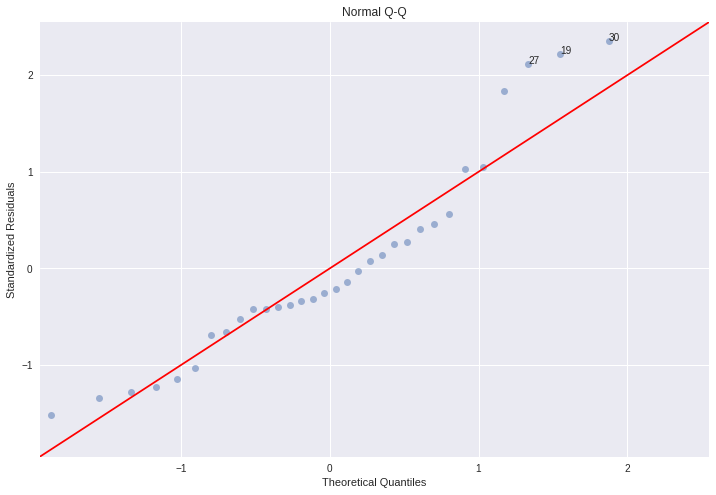

In [0]:
QQ = ProbPlot(reg1_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(reg1_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                  reg1_norm_residuals[i]));
plot_lm_2.show()

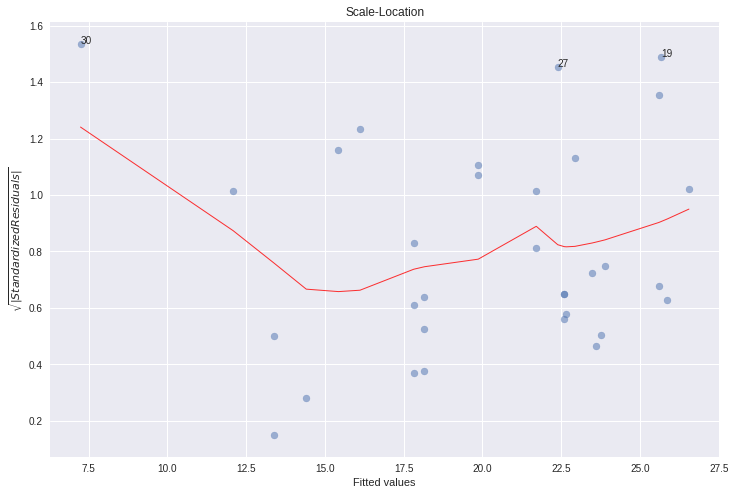

In [0]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(reg1_fitted_y, reg1_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(reg1_fitted_y, reg1_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(reg1_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(reg1_fitted_y[i], 
reg1_norm_residuals_abs_sqrt[i]));

This is another residual plot, showing their spread, which you can use to assess heteroscedasticity.

It’s essentially a scatter plot of absolute square-rooted normalized residuals and fitted values, with a lowess regression line. Scatterplot is a standard matplotlib function, lowess line comes from seaborn regplot

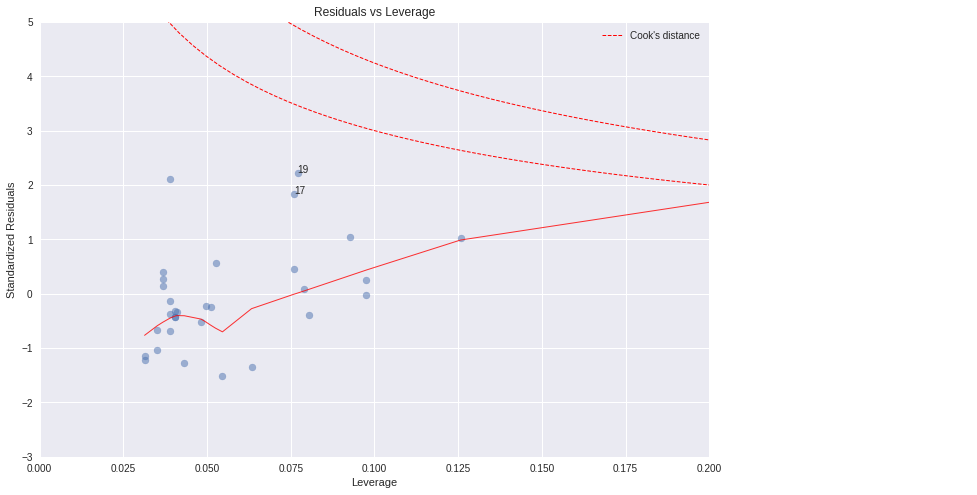

In [0]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(reg1_leverage, reg1_norm_residuals, alpha=0.5)
sns.regplot(reg1_leverage, reg1_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(reg1_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(reg1_leverage[i], 
                                   reg1_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(reg1.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line

plt.legend(loc='upper right');

This plot shows if any outliers have influence over the regression fit. Anything outside the group and outside “Cook’s Distance” lines, may have an influential effect on model fit. In here, we can see some points outside the group that might have that effect.

**9. This question involves the use of multiple linear regression on the Auto data set.**

**(a) Produce a scatterplot matrix which includes all of the variables in the data set.**

**(b) Compute the matrix of correlations between the variables using the function cor() . You will need to exclude the name variable,
cor() which is qualitative.**

**(c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name asthe predictors. Use the summary() function to print the results.**

**Comment on the output. For instance:**

**i. Is there a relationship between the predictors and the response?**

**ii. Which predictors appear to have a statistically significant relationship to the response?**

**iii. What does the coefficient for the year variable suggest?**

**d) Use the plot() function to produce diagnostic plots of the linearregression fit. Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high
leverage?**

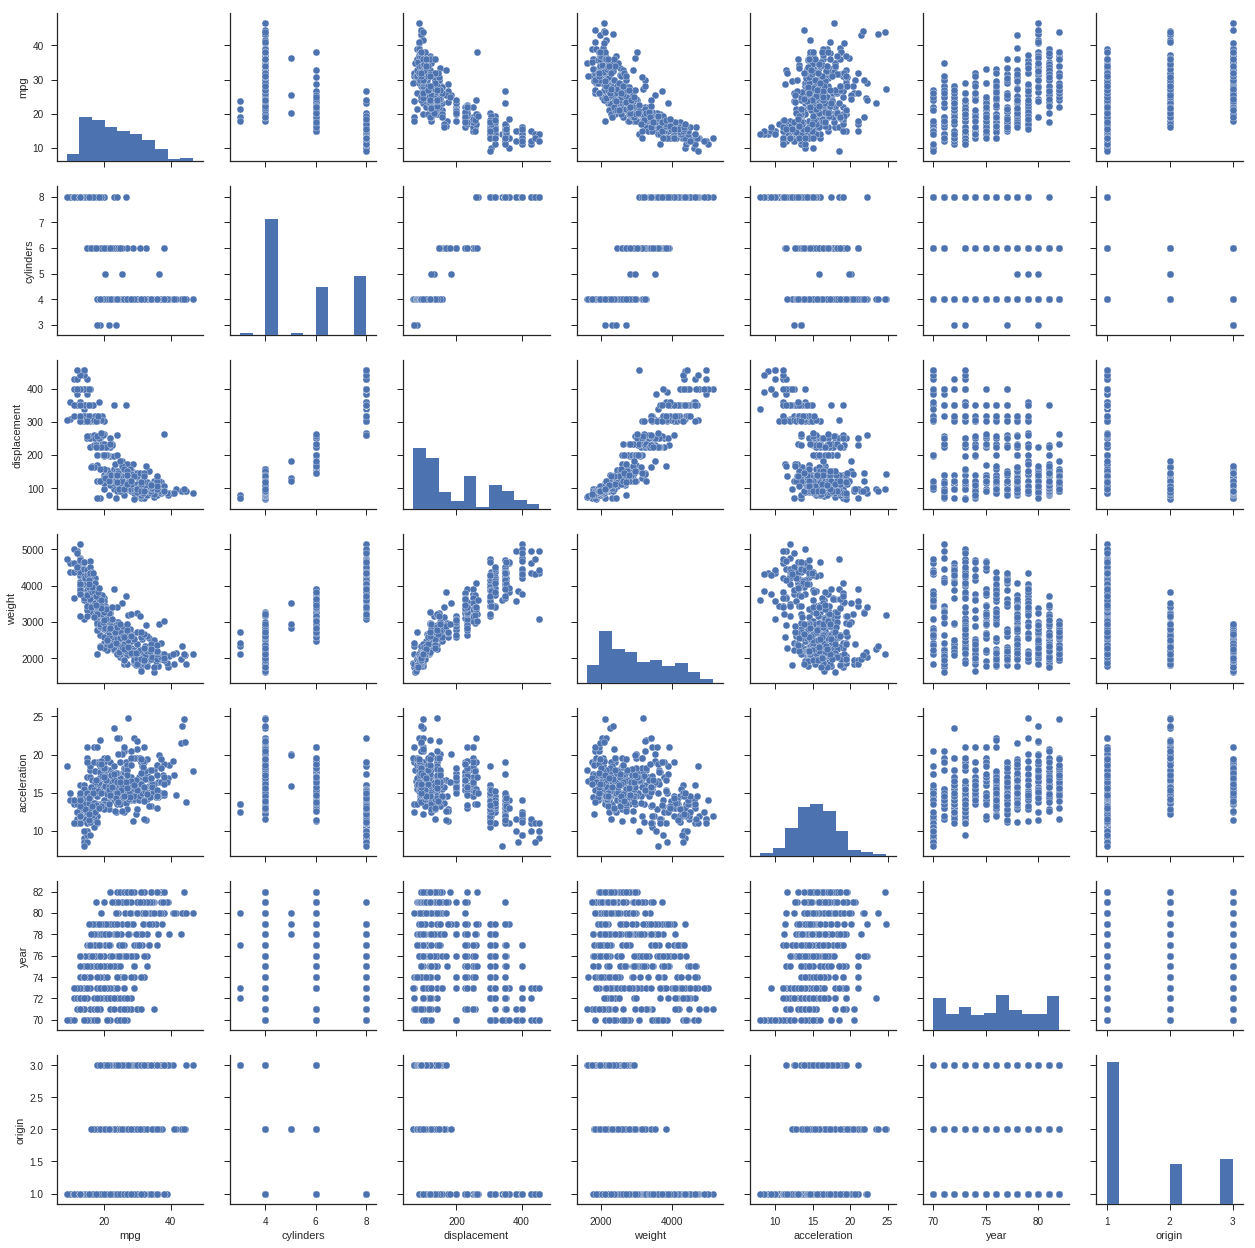

In [0]:
# (a) Produce a scatterplot matrix which includes all of the variables in the data set.
bd2 = pd.read_csv("https://www-bcf.usc.edu/~gareth/ISL/Auto.csv")


sns.set(style="ticks")

sns.pairplot(bd2)
plt.show()

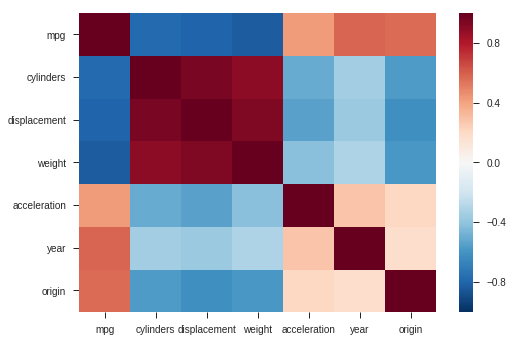

In [0]:
# (b) Compute the matrix of correlations between the variables.
# You will need to exclude the name variable, which is qualitative.


bd2 = bd2.drop('name', axis = 1)

corr = bd2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()





In [0]:
# (c) Perform a multiple linear regression with mpg as the response and all other variables
# except name as the predictors. Use the summary() function to print the results.

bd2['horsepower'] = pd.to_numeric(bd2['horsepower'],errors='coerce')

reg2 = sms.ols(formula = 'mpg ~ cylinders + displacement + weight + acceleration + year + origin + horsepower', data = bd2).fit()
print(reg2.summary())



                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     280.3
Date:                Mon, 25 Mar 2019   Prob (F-statistic):          1.13e-147
Time:                        01:37:14   Log-Likelihood:                -1040.4
No. Observations:                 397   AIC:                             2097.
Df Residuals:                     389   BIC:                             2129.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.6033      1.431     -1.121   

**Comment on the output. For instance:**

**i. Is there a relationship between the predictors and the response?**

Yes, between some of the predictors.

**ii. Which predictors appear to have a statistically significant relationship to the response?**

All, except acceleration

**iii. What does the coefficient for the year variable suggest?**

That older cars tend to be less economical gas-wise


**10. This question should be answered using the Carseats data set.**

**(a) Fit a multiple regression model to predict Sales using Price ,
Urban , and US .**

**(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!**

**(c) Write out the model in equation form, being careful to handle
the qualitative variables properly.**

**(d) For which of the predictors can you reject the null hypothesis
H 0 : β j = 0?**

**(e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.**

**(f) How well do the models in (a) and (e) fit the data?**

**(g) Using the model from (e), obtain 95 % confidence intervals for
the coefficient(s).**

**(h) Is there evidence of outliers or high leverage observations in the
model from (e)?**

In [0]:
#(a) Fit a multiple regression model to predict Sales using Price , Urban , and US .

bd3 = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Carseats.csv")

reg3 = sms.ols(formula = 'Sales ~ Price + Urban + US', data = bd3).fit()
print(reg3.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           2.39e-23
Time:                        01:42:43   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

**(b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!**

For the intercept -> If the predictors were zero, then the avarage price would be $\approx$ 13. Which makes no sense, we would have to transform some variables.

for urban -> On avarage being Urban means that Sales drops  2,19% 

for US -> On avarage being in the US means that Sales rise 120% 

for Price -> On avarage, for each marginal increment on price the sales drops  5,45%




**(c) Write out the model in equation form, being careful to handle the qualitative variables properly.**

$\hat y = 13,0435 - 0,0219 * x_1 + 1,2006 * x_2 - 0,545 * x_3$


**(d) For which of the predictors can you reject the null hypothesis H 0 : β j = 0?**

For the Urban coefficient

In [0]:
# (e) On the basis of your response to the previous question, fit a
# smaller model that only uses the predictors for which there is
# evidence of association with the outcome.


reg4 = sms.ols(formula = 'Sales ~ Price + US', data = bd3).fit()
print(reg4.summary())



                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           2.66e-24
Time:                        02:27:13   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

**(f) How well do the models in (a) and (e) fit the data?**

Both models poorly fits the data with a adjusted $R²$ of 0,234 and 0,235 respectively

**(g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).**

The response lies on the summary table

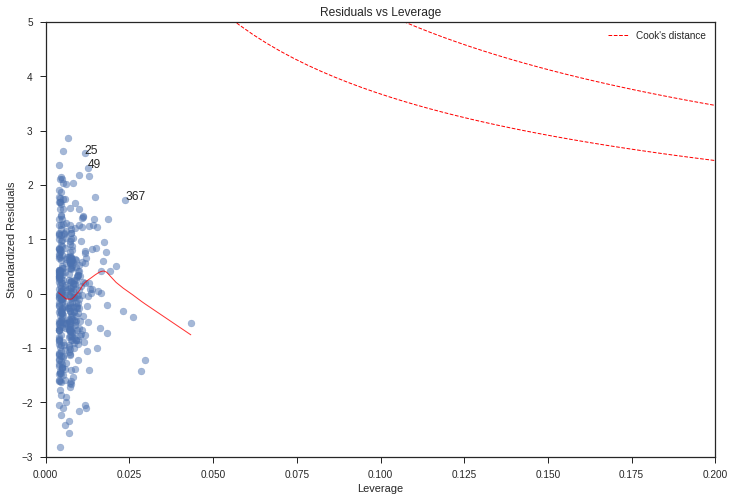

In [0]:
# (h) Is there evidence of outliers or high leverage observations in the model from (e)?

# fitted values (need a constant term for intercept)
reg4_fitted_y = reg4.fittedvalues

# model residuals
reg4_residuals = reg4.resid

# normalized residuals
reg4_norm_residuals = reg4.get_influence().resid_studentized_internal

# absolute squared normalized residuals
reg4_norm_residuals_abs_sqrt = np.sqrt(np.abs(reg4_norm_residuals))

# absolute residuals
reg4_abs_resid = np.abs(reg4_residuals)

# leverage, from statsmodels internals
reg4_leverage = reg4.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
reg4_cooks = reg4.get_influence().cooks_distance[0]

plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(reg4_leverage, reg4_norm_residuals, alpha=0.5)
sns.regplot(reg4_leverage, reg4_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(reg4_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(reg4_leverage[i], 
                                   reg4_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(reg4.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line

plt.legend(loc='upper right');

Yes, some outliers might be influencing this model since there are some ponits outside the group

**13. In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to use set.seed(1) prior to
starting part (a) to ensure consistent results.**

**(a) Using the rnorm() function, create a vector, x , containing 100
observations drawn from a N (0, 1) distribution. This represents
a feature, X.**

**(b) Using the rnorm() function, create a vector, eps , containing 100
observations drawn from a N (0, 0.25) distribution i.e. a normal
distribution with mean zero and variance 0.25.**

**(c) Using x and eps , generate a vector y according to the model
Y = −1 + 0.5X + e.
What is the length of the vector y ? What are the values of β 0
and β 1 in this linear model?**

**(d) Create a scatterplot displaying the relationship between x and
y . Comment on what you observe.**

**(e) Fit a least squares linear model to predict y using x . Comment
on the model obtained. How do β̂ 0 and β̂ 1 compare to β 0 and
β 1 ?**

**(f) Display the least squares line on the scatterplot obtained in (d).
Draw the population regression line on the plot, in a different
color. Use the legend() command to create an appropriate leg-
end.**

**(g) Now fit a polynomial regression model that predicts y using x
and x 2 . Is there evidence that the quadratic term improves the
model fit? Explain your answer.**

**(h) Repeat (a)–(f) after modifying the data generation process in
such a way that there is less noise in the data. The model (3.39)
should remain the same. You can do this by decreasing the vari-
ance of the normal distribution used to generate the error term
e in (b). Describe your results.**

**(i) Repeat (a)–(f) after modifying the data generation process in
such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term e in (b). Describe your results.**

**(j) What are the confidence intervals for β 0 and β 1 based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.**

In [0]:
# (a) Using the rnorm() function, create a vector, x , containing 100 observations
# drawn from a N (0, 1) distribution. This represents a feature, X.
# (b) Using the rnorm() function, create a vector, eps , containing 100 observations
# drawn from a N (0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

n = 100
bd4 = pd.DataFrame()
np.random.seed(1)
bd4['x'] = np.random.normal(0,1,n)
bd4['eps'] = np.random.normal(0,0.25,n)

bd4.head()


,x,eps
0,1.624345,-0.111782
1,-0.611756,0.306127
2,-0.528172,0.100873
3,-1.072969,0.148395
4,0.865408,-0.273728


**(c) Using x and eps , generate a vector y according to the model
Y = −1 + 0.5X + e. What is the length of the vector y ?
What are the values of β 0 and β 1 in this linear model?**

The vector *y* has the length of 100. The $\beta_0$ is -1 and the $\beta_1$ is 0.5

In [0]:
bd4['y'] = -1 + (0.5 * bd4['x'] + bd4['eps'])


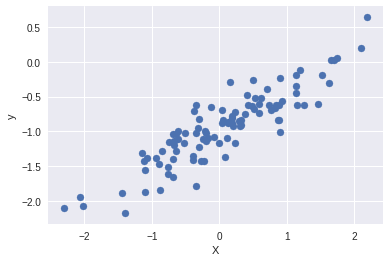

In [0]:
# (d) Create a scatterplot displaying the relationship between x and y .
# Comment on what you observe.

plt.scatter(x = bd4['x'], y = bd4['y'])
plt.xlabel('X')
plt.ylabel('y')
plt.show()



It looks like they have a linear relationship




In [0]:
# (e) Fit a least squares linear model to predict y using x . Comment
# on the model obtained. How do β̂ 0 and β̂ 1 compare to β 0 and
# β 1 ?

reg5 = sms.ols(formula = 'y ~ x', data = bd4).fit()
print(reg5.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           5.39e-36
Time:                        21:42:10   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9632      0.023    -40.999      0.0

The $\hat\beta's$ are really close to the $\beta's$.

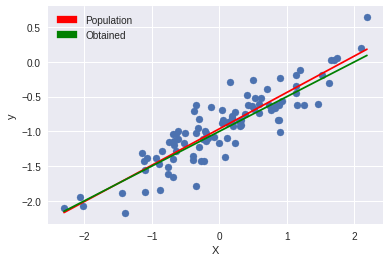

In [0]:
#(f) Display the least squares line on the scatterplot obtained in (d).
#Draw the population regression line on the plot, in a different
#color. Use the legend() command to create an appropriate legend.

import matplotlib.patches as mpatches

plt.scatter(x = bd4['x'], y = bd4['y'])
X_plot = np.linspace(min(bd4['x']), max(bd4['x']), len(bd4['x']))
pop = plt.plot(X_plot, X_plot*reg5.params[1] + reg5.params[0], color='r')
obt = plt.plot(X_plot, X_plot*0.5 + (-1), color='g')
red_patch = mpatches.Patch(color='red', label='Population')
green_patch = mpatches.Patch(color='green', label='Obtained')
plt.legend(handles=[red_patch, green_patch])

plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [0]:
# (g) Now fit a polynomial regression model that predicts y using x
# and x2. Is there evidence that the quadratic term improves the
# model fit? Explain your answer.



reg6 = sms.ols(formula = 'y ~ x + I(x**2.0)', data = bd4).fit()
print(reg6.summary())




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           1.32e-34
Time:                        22:11:19   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.9663      0.029    -33.486      

No, the adjusted $R^2$ is smaller.

**(h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the vari- ance of the normal distribution used to generate the error term e in (b). Describe your results.**


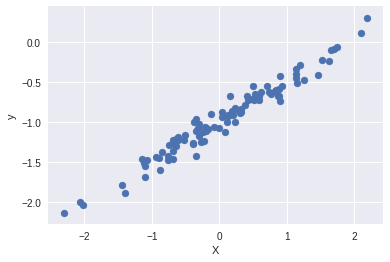

In [0]:
n = 100
bd5 = pd.DataFrame()
np.random.seed(1)
bd5['x'] = np.random.normal(0,1,n)
bd5['eps'] = np.random.normal(0,0.10,n)

bd5['y'] = -1 + (0.5 * bd5['x'] + bd5['eps'])


plt.scatter(x = bd5['x'], y = bd5['y'])
plt.xlabel('X')
plt.ylabel('y')
plt.show()



It looks like they have a linear relationship than the last one

In [0]:

reg7 = sms.ols(formula = 'y ~ x', data = bd5).fit()
print(reg7.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     2314.
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           5.58e-70
Time:                        22:36:15   Log-Likelihood:                 95.820
No. Observations:                 100   AIC:                            -187.6
Df Residuals:                      98   BIC:                            -182.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9853      0.009   -104.844      0.0

Has a way better fit

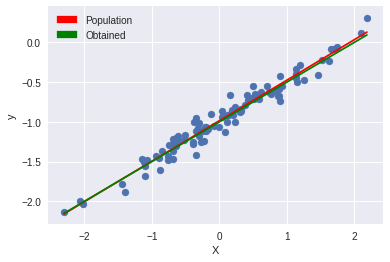

In [0]:
import matplotlib.patches as mpatches

plt.scatter(x = bd5['x'], y = bd5['y'])
X_plot = np.linspace(min(bd5['x']), max(bd5['x']), len(bd5['x']))
pop = plt.plot(X_plot, X_plot*reg7.params[1] + reg7.params[0], color='r')
obt = plt.plot(X_plot, X_plot*0.5 + (-1), color='g')
red_patch = mpatches.Patch(color='red', label='Population')
green_patch = mpatches.Patch(color='green', label='Obtained')
plt.legend(handles=[red_patch, green_patch])

plt.xlabel('X')
plt.ylabel('y')
plt.show()

**(i) Repeat (a)–(f) after modifying the data generation process in
such a way that there is more noise in the data. The model
should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term  in (b). Describe your results.**

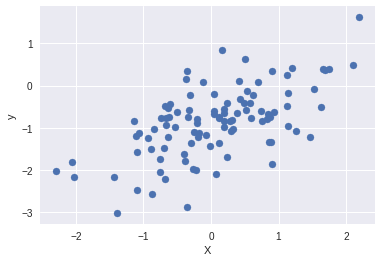

In [0]:
n = 100
bd6 = pd.DataFrame()
np.random.seed(1)
bd6['x'] = np.random.normal(0,1,n)
bd6['eps'] = np.random.normal(0,0.70,n)

bd6['y'] = -1 + (0.5 * bd6['x'] + bd6['eps'])


plt.scatter(x = bd6['x'], y = bd6['y'])
plt.xlabel('X')
plt.ylabel('y')
plt.show()


It clearly has more variance in the data

In [0]:

reg8 = sms.ols(formula = 'y ~ x', data = bd6).fit()
print(reg8.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     58.44
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           1.44e-11
Time:                        22:44:19   Log-Likelihood:                -98.771
No. Observations:                 100   AIC:                             201.5
Df Residuals:                      98   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8971      0.066    -13.637      0.0

Also has a poorer fit

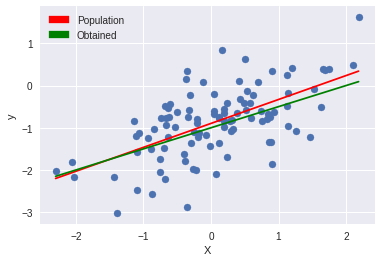

In [0]:
plt.scatter(x = bd6['x'], y = bd6['y'])
X_plot = np.linspace(min(bd6['x']), max(bd6['x']), len(bd6['x']))
pop = plt.plot(X_plot, X_plot*reg8.params[1] + reg8.params[0], color='r')
obt = plt.plot(X_plot, X_plot*0.5 + (-1), color='g')
red_patch = mpatches.Patch(color='red', label='Population')
green_patch = mpatches.Patch(color='green', label='Obtained')
plt.legend(handles=[red_patch, green_patch])

plt.xlabel('X')
plt.ylabel('y')
plt.show()

The regression lines are further apart

**(j) What are the confidence intervals for β0 and β1 based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results**

The results are in the regression summaries.
The noisier data has a larger confidence interval for both, the less noisy data has the smallest confidence interval and the original is in the middle. It makes sense because of the variance

**15. This problem involves the Boston data set, which we saw in the lab
for this chapter. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.**

**(a) For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.**

**(b) Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis H0 : βj = 0?**

**(c) How do your results from (a) compare to your results from (b)?
Create a plot displaying the univariate regression coefficients
from (a) on the x-axis, and the multiple regression coefficients
from (b) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.**

**(d) Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor X, fit a model of the form
Y = β0 + β1X + β2X2 + β3X3 + e**

**(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.**

In [0]:
bd7 = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Boston.csv')
bd7.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [0]:

reg9 = sms.ols(formula = 'crim ~ zn', data = bd7).fit()

print(reg9.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           5.51e-06
Time:                        22:49:22   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4537      0.417     10.675      0.0

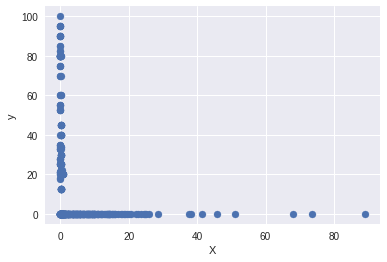

In [0]:
plt.scatter(x = bd7['crim'], y = bd7['zn'])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [0]:

reg10 = sms.ols(formula = 'crim ~ indus', data = bd7).fit()

print(reg10.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     99.82
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           1.45e-21
Time:                        22:54:13   Log-Likelihood:                -1760.6
No. Observations:                 506   AIC:                             3525.
Df Residuals:                     504   BIC:                             3534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0637      0.667     -3.093      0.0

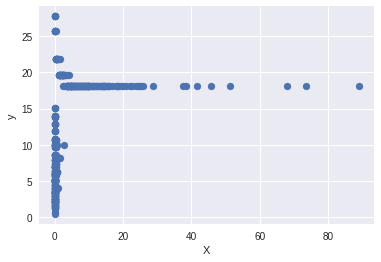

In [0]:
plt.scatter(x = bd7['crim'], y = bd7['indus'])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [0]:

reg11 = sms.ols(formula = 'crim ~ chas', data = bd7).fit()

print(reg11.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Tue, 02 Apr 2019   Prob (F-statistic):              0.209
Time:                        22:55:37   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7444      0.396      9.453      0.0

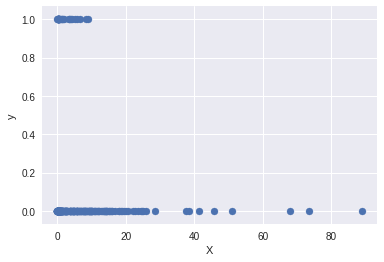

In [0]:
plt.scatter(x = bd7['crim'], y = bd7['chas'])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [0]:
reg12 = sms.ols(formula = 'crim ~ nox', data = bd7).fit()

print(reg12.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.6
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           3.75e-23
Time:                        22:56:28   Log-Likelihood:                -1757.0
No. Observations:                 506   AIC:                             3518.
Df Residuals:                     504   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.7199      1.699     -8.073      0.0

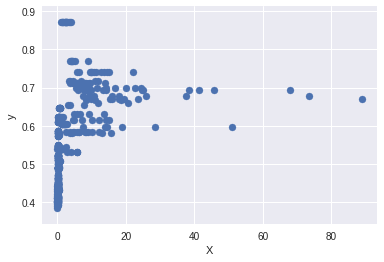

In [0]:
plt.scatter(x = bd7['crim'], y = bd7['nox'])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [0]:
reg13 = sms.ols(formula = 'crim ~ rm', data = bd7).fit()

print(reg13.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.45
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           6.35e-07
Time:                        22:57:27   Log-Likelihood:                -1793.9
No. Observations:                 506   AIC:                             3592.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.4818      3.364      6.088      0.0

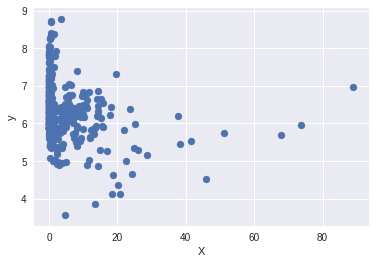

In [0]:
plt.scatter(x = bd7['crim'], y = bd7['rm'])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [0]:
reg14 = sms.ols(formula = 'crim ~ age', data = bd7).fit()

print(reg14.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     71.62
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           2.85e-16
Time:                        22:58:27   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7779      0.944     -4.002      0.0

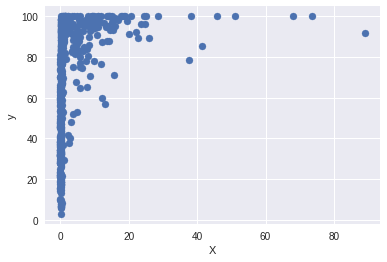

In [0]:
plt.scatter(x = bd7['crim'], y = bd7['age'])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [0]:
reg15 = sms.ols(formula = 'crim ~ dis', data = bd7).fit()

print(reg15.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     84.89
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           8.52e-19
Time:                        22:59:11   Log-Likelihood:                -1767.0
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4993      0.730     13.006      0.0

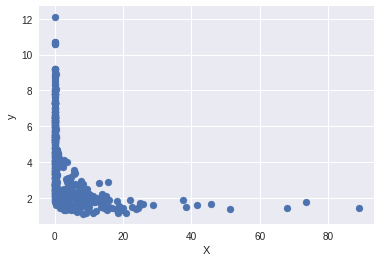

In [0]:
plt.scatter(x = bd7['crim'], y = bd7['dis'])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [0]:
reg16 = sms.ols(formula = 'crim ~ rad', data = bd7).fit()

print(reg16.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     323.9
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           2.69e-56
Time:                        23:00:21   Log-Likelihood:                -1680.8
No. Observations:                 506   AIC:                             3366.
Df Residuals:                     504   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2872      0.443     -5.157      0.0

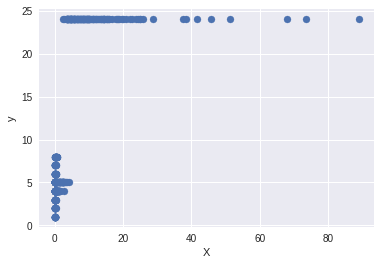

In [0]:
plt.scatter(x = bd7['crim'], y = bd7['rad'])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [0]:
reg17 = sms.ols(formula = 'crim ~ tax', data = bd7).fit()

print(reg17.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           2.36e-47
Time:                        23:01:18   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5284      0.816    -10.454      0.0

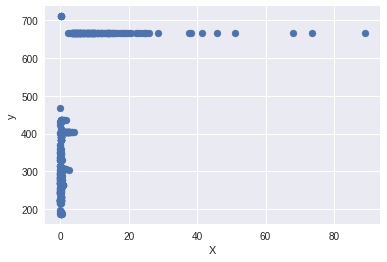

In [0]:
plt.scatter(x = bd7['crim'], y = bd7['tax'])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [0]:
reg18 = sms.ols(formula = 'crim ~ ptratio', data = bd7).fit()

print(reg18.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           2.94e-11
Time:                        23:02:15   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.6469      3.147     -5.607      0.0

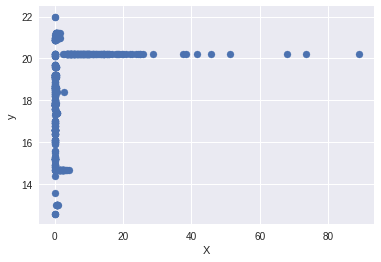

In [0]:
plt.scatter(x = bd7['crim'], y = bd7['ptratio'])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [0]:
reg19 = sms.ols(formula = 'crim ~ black', data = bd7).fit()

print(reg19.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     87.74
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           2.49e-19
Time:                        23:03:00   Log-Likelihood:                -1765.8
No. Observations:                 506   AIC:                             3536.
Df Residuals:                     504   BIC:                             3544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.5535      1.426     11.609      0.0

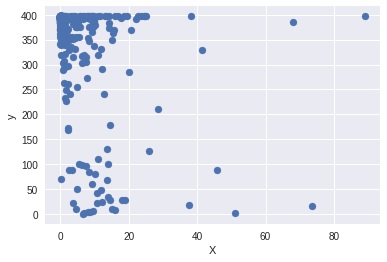

In [0]:
plt.scatter(x = bd7['crim'], y = bd7['black'])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [0]:
reg20 = sms.ols(formula = 'crim ~ lstat', data = bd7).fit()

print(reg20.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     132.0
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           2.65e-27
Time:                        23:03:39   Log-Likelihood:                -1747.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     504   BIC:                             3507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3305      0.694     -4.801      0.0

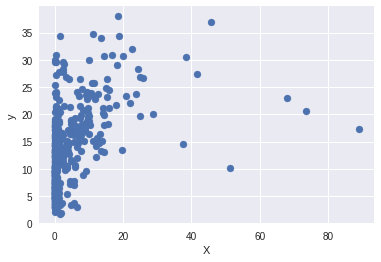

In [0]:
plt.scatter(x = bd7['crim'], y = bd7['lstat'])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [0]:
reg21 = sms.ols(formula = 'crim ~ medv', data = bd7).fit()

print(reg21.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           1.17e-19
Time:                        23:04:15   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7965      0.934     12.628      0.0

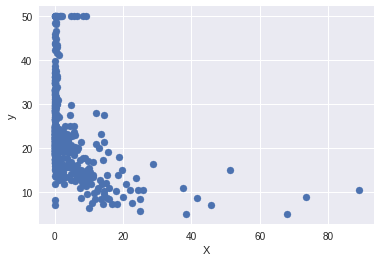

In [0]:
plt.scatter(x = bd7['crim'], y = bd7['medv'])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

As we can see, if we fit a simple regression, most of the independent variables are significant(zn, indus, nox, rm, age, dis, rad, tax, ptratio, black, lstat, medv), but some more than others.

**(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?**

In [0]:
reg22 = sms.ols(formula = 'crim ~ zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat + medv', data = bd7).fit()

print(reg22.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           1.57e-56
Time:                        23:17:23   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.0

we accept the null hypothesis in all the variables minus indus, chas, nox, rm , age, tax, ptratio, lstat. It's a bit different than the results we had in the simple regression.

**(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.**

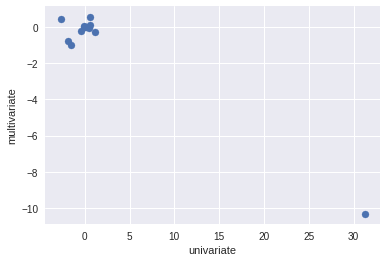

In [83]:
univariate = [reg9.params[1], reg10.params[1], reg11.params[1], reg12.params[1], reg13.params[1], reg14.params[1],
              reg15.params[1], reg16.params[1], reg17.params[1], reg18.params[1], reg19.params[1], reg20.params[1], reg21.params[1]]

multivariate = list(reg22.params[1:])

  
plt.scatter(x = univariate, y = multivariate)
plt.xlabel('univariate')
plt.ylabel('multivariate')
plt.show()


**(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form Y = β0 + β1X + β2X2 + β3X3 + e**

In [84]:
reg23 = sms.ols(formula = 'crim ~ zn + I(zn**2.0) + I(zn**3.0)', data = bd7).fit()

print(reg23.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           1.28e-06
Time:                        00:47:32   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.8461      0.433     11.192   

In [86]:
reg24 = sms.ols(formula = 'crim ~ indus + I(indus**2.0) + I(indus**3.0)', data = bd7).fit()

print(reg24.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     58.69
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           1.55e-32
Time:                        00:48:16   Log-Likelihood:                -1730.3
No. Observations:                 506   AIC:                             3469.
Df Residuals:                     502   BIC:                             3486.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.6626      1.574     

In [87]:
reg25 = sms.ols(formula = 'crim ~ chas + I(chas**2.0) + I(chas**3.0)', data = bd7).fit()

print(reg25.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Wed, 03 Apr 2019   Prob (F-statistic):              0.209
Time:                        00:48:42   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7444      0.396      9.

In [88]:
reg26 = sms.ols(formula = 'crim ~ nox + I(nox**2.0) + I(nox**3.0)', data = bd7).fit()

print(reg26.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     70.69
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           3.81e-38
Time:                        00:49:05   Log-Likelihood:                -1717.2
No. Observations:                 506   AIC:                             3442.
Df Residuals:                     502   BIC:                             3459.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       233.0866     33.643      6.928

In [89]:
reg27 = sms.ols(formula = 'crim ~ rm + I(rm**2.0) + I(rm**3.0)', data = bd7).fit()

print(reg27.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     12.17
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           1.07e-07
Time:                        00:49:30   Log-Likelihood:                -1788.6
No. Observations:                 506   AIC:                             3585.
Df Residuals:                     502   BIC:                             3602.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      112.6246     64.517      1.746   

In [90]:
reg28 = sms.ols(formula = 'crim ~ age + I(age**2.0) + I(age**3.0)', data = bd7).fit()

print(reg28.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     35.31
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           1.02e-20
Time:                        00:49:50   Log-Likelihood:                -1757.9
No. Observations:                 506   AIC:                             3524.
Df Residuals:                     502   BIC:                             3541.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.5488      2.769     -0.920

In [91]:
reg29 = sms.ols(formula = 'crim ~ dis + I(dis**2.0) + I(dis**3.0)', data = bd7).fit()

print(reg29.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     64.37
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           3.14e-35
Time:                        00:50:16   Log-Likelihood:                -1724.0
No. Observations:                 506   AIC:                             3456.
Df Residuals:                     502   BIC:                             3473.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        30.0476      2.446     12.285

In [92]:
reg30 = sms.ols(formula = 'crim ~ rad + I(rad**2.0) + I(rad**3.0)', data = bd7).fit()

print(reg30.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     111.6
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           2.31e-55
Time:                        00:50:36   Log-Likelihood:                -1677.1
No. Observations:                 506   AIC:                             3362.
Df Residuals:                     502   BIC:                             3379.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.6055      2.050     -0.295

In [93]:
reg31 = sms.ols(formula = 'crim ~ tax + I(tax**2.0) + I(tax**3.0)', data = bd7).fit()

print(reg31.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     97.80
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           7.34e-50
Time:                        00:51:07   Log-Likelihood:                -1689.9
No. Observations:                 506   AIC:                             3388.
Df Residuals:                     502   BIC:                             3405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        19.1836     11.796      1.626

In [94]:
reg32 = sms.ols(formula = 'crim ~ ptratio + I(ptratio**2.0) + I(ptratio**3.0)', data = bd7).fit()

print(reg32.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     21.48
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           4.17e-13
Time:                        00:51:25   Log-Likelihood:                -1775.8
No. Observations:                 506   AIC:                             3560.
Df Residuals:                     502   BIC:                             3577.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           477.1840    156.79

In [95]:
reg33 = sms.ols(formula = 'crim ~ black + I(black**2.0) + I(black**3.0)', data = bd7).fit()

print(reg33.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     29.49
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           1.41e-17
Time:                        00:51:45   Log-Likelihood:                -1765.3
No. Observations:                 506   AIC:                             3539.
Df Residuals:                     502   BIC:                             3555.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          18.2637      2.305     

In [96]:
reg34 = sms.ols(formula = 'crim ~ lstat + I(lstat**2.0) + I(lstat**3.0)', data = bd7).fit()

print(reg34.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     46.63
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           1.35e-26
Time:                        00:52:02   Log-Likelihood:                -1744.2
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     502   BIC:                             3513.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2010      2.029     

In [97]:
reg35 = sms.ols(formula = 'crim ~ medv + I(medv**2.0) + I(medv**3.0)', data = bd7).fit()

print(reg35.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     121.3
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           4.45e-59
Time:                        00:52:20   Log-Likelihood:                -1668.5
No. Observations:                 506   AIC:                             3345.
Df Residuals:                     502   BIC:                             3362.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         53.1655      3.356     15.

It seems that some variables has a better fit non-linearly